<a href="https://colab.research.google.com/github/wanchenlang-max/econ-lab/blob/main/midterm_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

series = {
    "CPI": "CPIAUCSL",
    "FEDFUNDS": "FEDFUNDS",
    "DGS10": "DGS10"
}

start = "1970-01-01"

df = pd.DataFrame()

for name, code in series.items():
    s = pdr.DataReader(code, "fred", start)
    s = s.rename(columns={code: name})
    df = s if df.empty else df.join(s, how="outer")

df.head()

,CPI,FEDFUNDS,DGS10
DATE,,,
1970-01-01,37.9,8.98,NaN
1970-01-02,NaN,NaN,7.86
1970-01-05,NaN,NaN,7.88
1970-01-06,NaN,NaN,7.96
1970-01-07,NaN,NaN,7.99


In [ ]:
df_m = df.resample("ME").last()
df_m = df_m.ffill()

df_m.head()

,CPI,FEDFUNDS,DGS10
DATE,,,
1970-01-31,37.9,8.98,7.75
1970-02-28,38.1,8.98,6.90
1970-03-31,38.3,7.76,7.08
1970-04-30,38.5,8.10,7.82
1970-05-31,38.6,7.95,7.95


In [ ]:
df_m["inflation"] = df_m["CPI"].pct_change(12)

df_m.head(15)

,CPI,FEDFUNDS,DGS10,inflation
DATE,,,,
1970-01-31,37.9,8.98,7.75,NaN
1970-02-28,38.1,8.98,6.90,NaN
1970-03-31,38.3,7.76,7.08,NaN
1970-04-30,38.5,8.10,7.82,NaN
1970-05-31,38.6,7.95,7.95,NaN
1970-06-30,38.8,7.61,7.68,NaN
1970-07-31,38.9,7.21,7.38,NaN
1970-08-31,39.0,6.62,7.49,NaN
1970-09-30,39.2,6.29,7.29,NaN


In [ ]:
h = 12
df_m["y"] = df_m["inflation"].shift(-h)

In [ ]:
df_clean = df_m.dropna().copy()

df_clean.head()
df_clean.tail()

,CPI,FEDFUNDS,DGS10,inflation,y
DATE,,,,,
2024-10-31,315.631,4.83,4.28,0.025788,0.027291
2024-11-30,316.528,4.64,4.18,0.027195,0.026964
2024-12-31,317.604,4.48,4.58,0.028707,0.026533
2025-01-31,318.961,4.33,4.58,0.029910,0.023912
2025-02-28,319.679,4.33,4.24,0.028016,0.021612


In [ ]:
X = df_clean[["FEDFUNDS", "DGS10"]]
y = df_clean["y"]

X.head()
y.head()

,y
DATE,
1971-01-31,0.032581
1971-02-28,0.037594
1971-03-31,0.035000
1971-04-30,0.034913
1971-05-31,0.032258


In [ ]:
df_clean.index.min(), df_clean.index.max()

(Timestamp('1971-01-31 00:00:00'), Timestamp('2025-02-28 00:00:00'))

In [ ]:
df_clean.describe()

,CPI,FEDFUNDS,DGS10,inflation,y
count,650.000000,650.000000,650.000000,650.000000,650.000000
mean,163.054562,4.867815,5.957138,0.039811,0.039508
std,74.348836,3.891961,3.155493,0.029248,0.029300
min,39.900000,0.050000,0.550000,-0.019588,-0.019588
25%,104.175000,1.450000,3.490000,0.021256,0.021256
50%,162.000000,4.945000,5.830000,0.031567,0.030669
75%,225.928250,6.777500,7.882500,0.048207,0.048169
max,319.679000,19.100000,15.840000,0.145923,0.145923


<Axes: title={'center': 'Inflation'}, xlabel='DATE'>

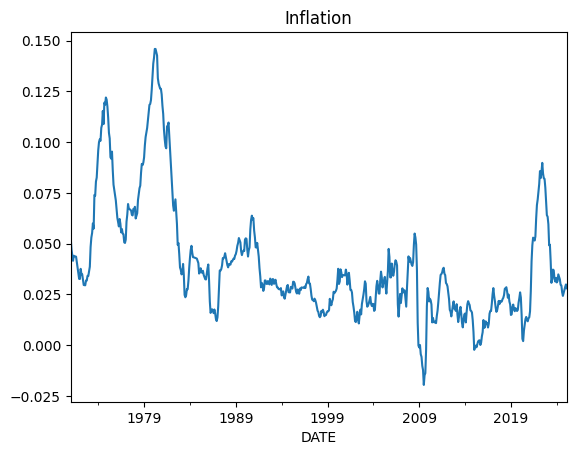

In [ ]:
df_clean["inflation"].plot(title="Inflation")

In [ ]:
df_clean.isna().sum()

,0
CPI,0
FEDFUNDS,0
DGS10,0
inflation,0
y,0


In [ ]:
df_clean.loc[:, "spread"] = df_clean["DGS10"] - df_clean["FEDFUNDS"]

In [ ]:
df_clean.shape
df_clean.index.min()
df_clean.index.max()

Timestamp('2025-02-28 00:00:00')

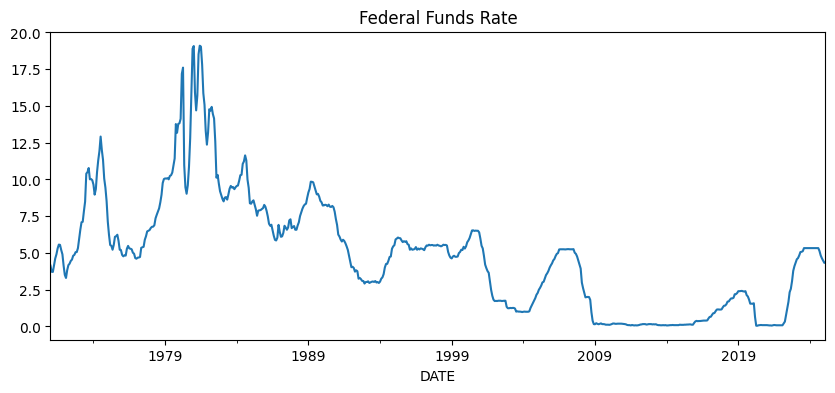

In [ ]:
df_clean["FEDFUNDS"].plot(figsize=(10,4), title="Federal Funds Rate")
plt.show()

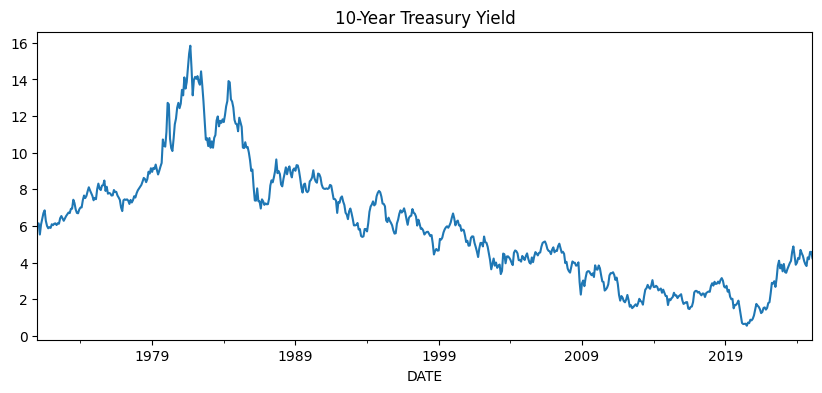

In [ ]:
df_clean["DGS10"].plot(figsize=(10,4), title="10-Year Treasury Yield")
plt.show()

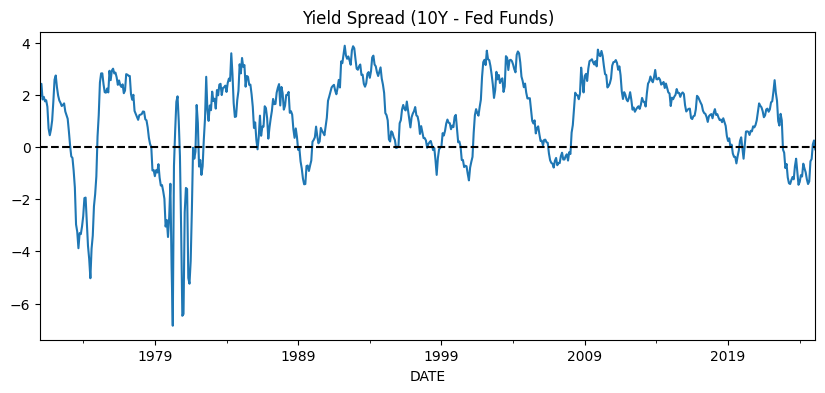

In [ ]:
df_clean["spread"].plot(figsize=(10,4), title="Yield Spread (10Y - Fed Funds)")
plt.axhline(0, color="black", linestyle="--")
plt.show()

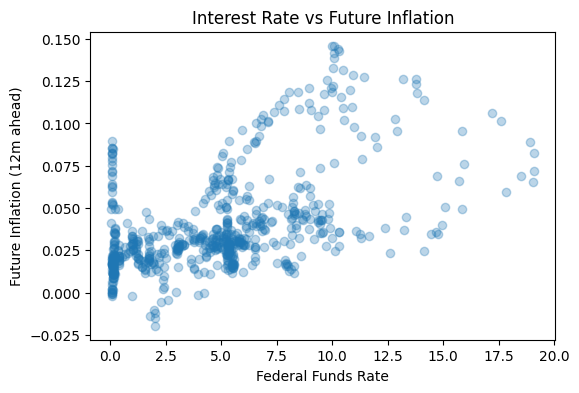

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df_clean["FEDFUNDS"], df_clean["y"], alpha=0.3)
plt.xlabel("Federal Funds Rate")
plt.ylabel("Future Inflation (12m ahead)")
plt.title("Interest Rate vs Future Inflation")
plt.show()

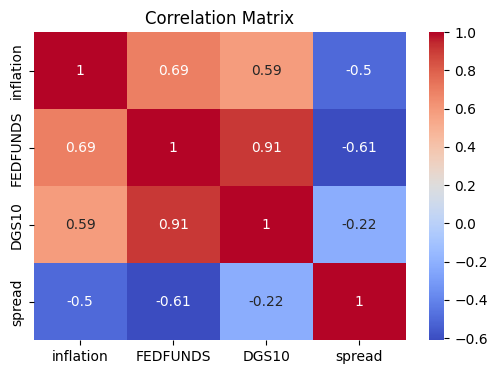

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(
    df_clean[["inflation","FEDFUNDS","DGS10","spread"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_clean[["inflation","FEDFUNDS","DGS10","spread"]].describe()

,inflation,FEDFUNDS,DGS10,spread
count,650.000000,650.000000,650.000000,650.000000
mean,0.039811,4.867815,5.957138,1.089323
std,0.029248,3.891961,3.155493,1.688248
min,-0.019588,0.050000,0.550000,-6.850000
25%,0.021256,1.450000,3.490000,0.185000
50%,0.031567,4.945000,5.830000,1.360000
75%,0.048207,6.777500,7.882500,2.300000
max,0.145923,19.100000,15.840000,3.880000


Train period: 1971-01-31 00:00:00 to 2005-12-31 00:00:00 n= 420
Test period : 2006-01-31 00:00:00 to 2025-02-28 00:00:00 n= 230

=== Model Comparison (Test 2006-2025) ===


,Model,RMSE,MAE
0,Gradient Boosting,0.020114,0.015536
1,Random Forest,0.020591,0.016010
2,Ridge Regression,0.023375,0.019425
3,Linear Regression,0.023378,0.019429


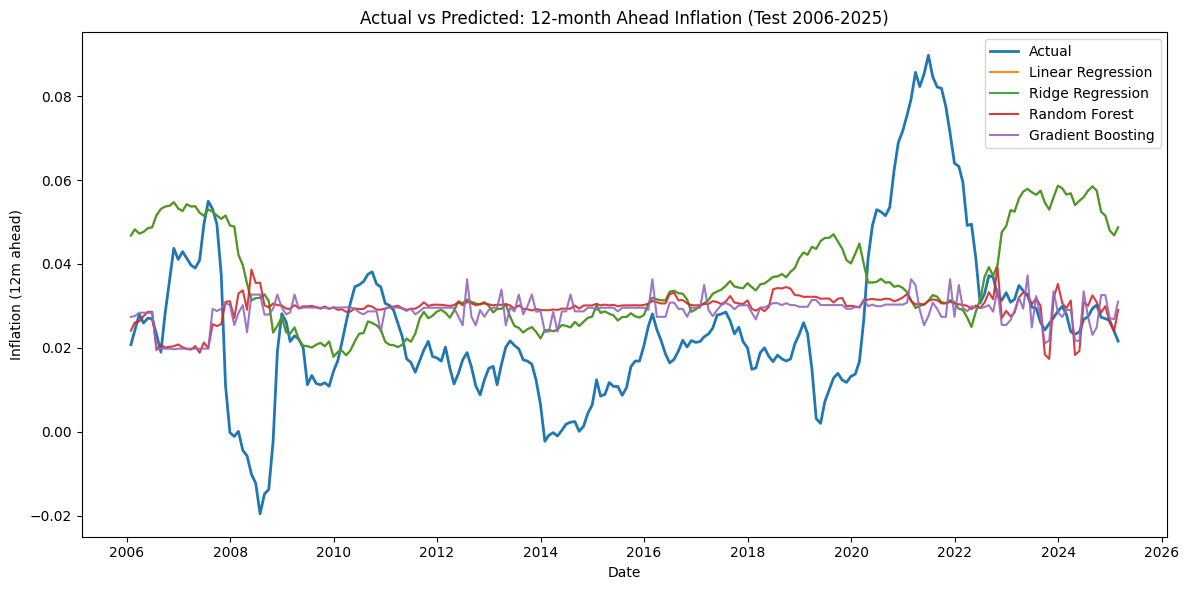

,Feature,Importance
2,spread,0.532690
1,DGS10,0.282039
0,FEDFUNDS,0.185271


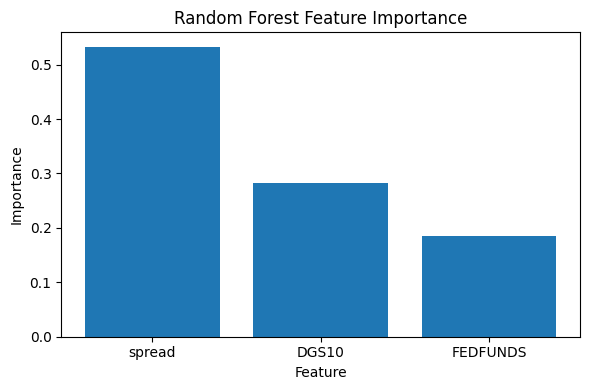

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ========== 0) 确认关键列都存在 ==========
needed_cols = ["FEDFUNDS", "DGS10", "spread", "y"]
missing = [c for c in needed_cols if c not in df_clean.columns]
if missing:
    raise ValueError(f"df_clean 缺少这些列：{missing}\n"
                     f"你现在 df_clean.columns = {list(df_clean.columns)}")

# ========== 1) 时间序列切分（不要 random split） ==========
train = df_clean.loc[:'2005-12-31'].copy()
test  = df_clean.loc['2006-01-01':].copy()

X_train = train[["FEDFUNDS", "DGS10", "spread"]]
y_train = train["y"]

X_test = test[["FEDFUNDS", "DGS10", "spread"]]
y_test = test["y"]

print("Train period:", train.index.min(), "to", train.index.max(), "n=", len(train))
print("Test period :", test.index.min(),  "to", test.index.max(),  "n=", len(test))

# ========== 2) 四个模型 ==========
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=500,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ========== 3) 训练 + 预测 + 评估(RMSE/MAE) ==========
preds = {}
rows = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds[name] = y_pred

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    rows.append([name, rmse, mae])

result_df = pd.DataFrame(rows, columns=["Model", "RMSE", "MAE"]).sort_values("RMSE")
result_df.reset_index(drop=True, inplace=True)

print("\n=== Model Comparison (Test 2006-2025) ===")
display(result_df)

# ========== 4) 画图：Actual vs Predicted（所有模型同一张图） ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual", linewidth=2)

for name in models.keys():
    plt.plot(y_test.index, preds[name], label=name, alpha=0.9)

plt.title("Actual vs Predicted: 12-month Ahead Inflation (Test 2006-2025)")
plt.xlabel("Date")
plt.ylabel("Inflation (12m ahead)")
plt.legend()
plt.tight_layout()
plt.show()

# ========== 5) Random Forest Feature Importance ==========
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_names = X_train.columns

fi = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values("Importance", ascending=False)
display(fi)

plt.figure(figsize=(6,4))
plt.bar(fi["Feature"], fi["Importance"])
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()